Data Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1598.000000  1599.000000   
mean      0.087467            15.874922             46.433041     0.996747   
std       0.047065            10.460157             32.876249     0.001887   
min       0.012000             1.0

<ipython-input-14-4e2ce9b4df39>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis')


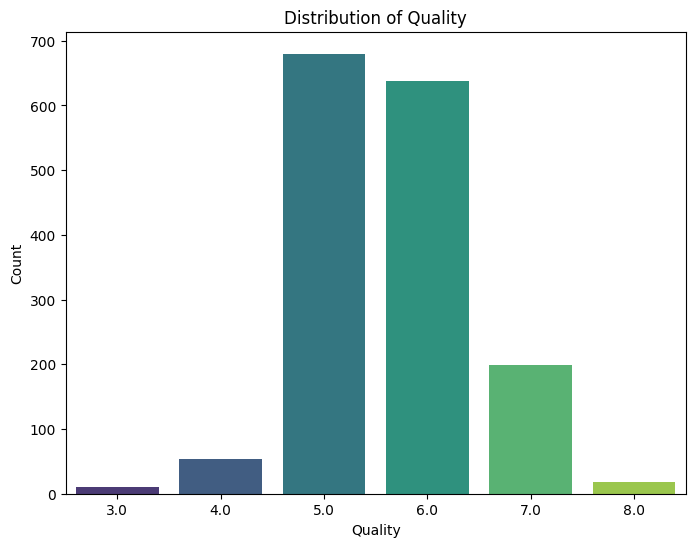

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/Major Project Dataset (Wine Classification).csv')

# EDA
# Display basic statistics of the dataset
print("Data Summary:")
print(data.describe())

# Display counts and unique values for categorical features
print("\nCounts and Unique Values for Categorical Features:")
for column in data.select_dtypes(include=['object']):
    print(f"\n{column}:")
    print(data[column].value_counts())

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Convert continuous target variable into discrete classes using binning
bins = [0, 4, 6, 10]  # Define bins based on quality thresholds
labels = ['Low', 'Medium', 'High']  # Define labels for each bin
data_imputed['quality'] = pd.cut(data_imputed['quality'], bins=bins, labels=labels)

# Split the data into features and target
X = data_imputed.drop('quality', axis=1)
y = data_imputed['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy (Random Forest): 0.871875
Classification Report (Random Forest):
               precision    recall  f1-score   support

        High       0.76      0.53      0.62        47
         Low       0.00      0.00      0.00        11
      Medium       0.89      0.97      0.93       262

    accuracy                           0.87       320
   macro avg       0.55      0.50      0.52       320
weighted avg       0.84      0.87      0.85       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


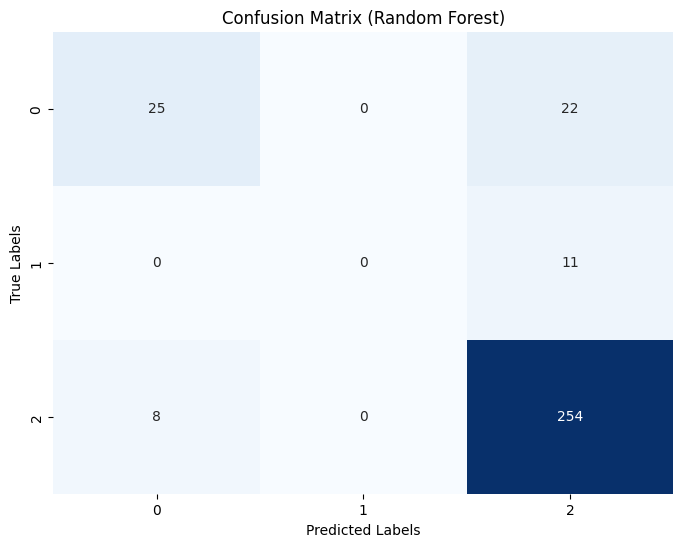

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train Random Forest classifier
random_forest.fit(X_train, y_train)

# Predict on test set
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# Calculate classification report
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest):\n", report_rf)

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Evaluation Metrics (Gradient Boosting):
Accuracy: 0.834375
F1 Score: 0.8208411524504433
Recall: 0.834375

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

        High       0.62      0.43      0.51        47
         Low       0.29      0.18      0.22        11
      Medium       0.87      0.94      0.90       262

    accuracy                           0.83       320
   macro avg       0.59      0.51      0.54       320
weighted avg       0.82      0.83      0.82       320



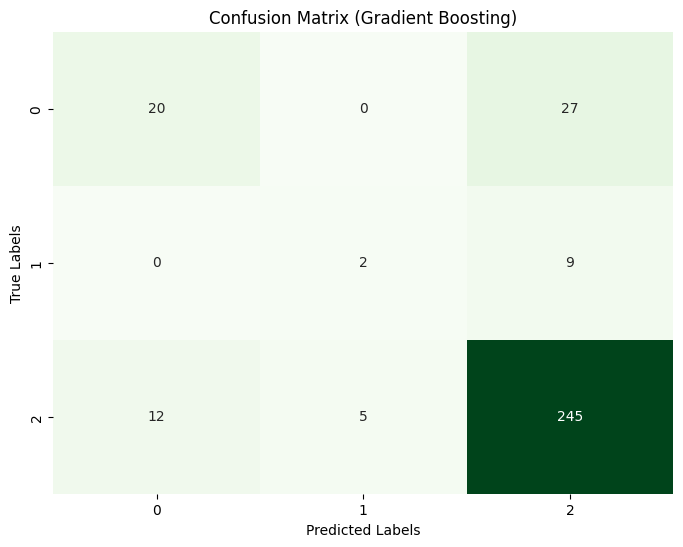

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)

# Predict on test set
y_pred_gb = gradient_boosting.predict(X_test)

# Calculate evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')

# Print evaluation metrics
print("Evaluation Metrics (Gradient Boosting):")
print("Accuracy:", accuracy_gb)
print("F1 Score:", f1_gb)
print("Recall:", recall_gb)

# Calculate classification report
report_gb = classification_report(y_test, y_pred_gb)
print("\nClassification Report (Gradient Boosting):\n", report_gb)

# Sort feature importances in descending order
indices_gb = feature_importances_gb.argsort()[::-1]


# Calculate confusion matrix for Gradient Boosting classifier
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix for Gradient Boosting classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



Evaluation Metrics (SVM):
Accuracy: 0.81875
F1 Score: 0.7371563573883161
Recall: 0.81875

Classification Report (SVM):
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        47
         Low       0.00      0.00      0.00        11
      Medium       0.82      1.00      0.90       262

    accuracy                           0.82       320
   macro avg       0.27      0.33      0.30       320
weighted avg       0.67      0.82      0.74       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


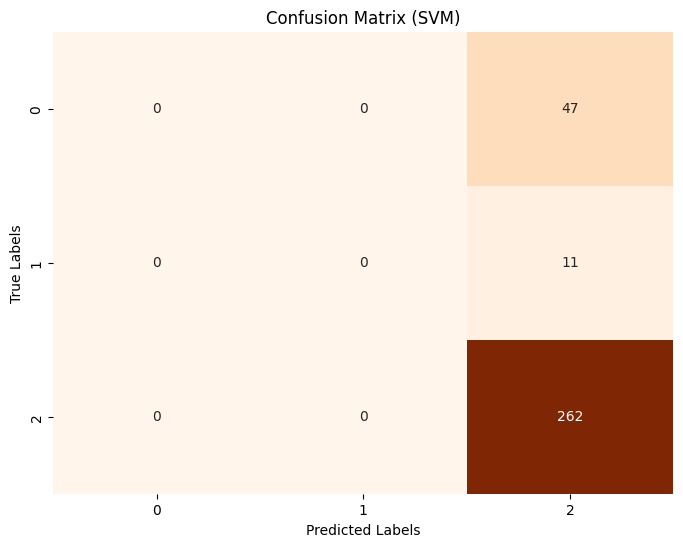

In [12]:
from sklearn.svm import SVC

# Train Support Vector Machine classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict on test set with SVM
y_pred_svm = svm.predict(X_test)

# Calculate evaluation metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Print evaluation metrics for SVM
print("Evaluation Metrics (SVM):")
print("Accuracy:", accuracy_svm)
print("F1 Score:", f1_svm)
print("Recall:", recall_svm)

# Calculate classification report for SVM
report_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report (SVM):\n", report_svm)

# Plot confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



